# House prices : Advanced Regression Techniques



## Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## File descriptions.

- **train.csv** - the training set
- **test.csv** - the test set
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Code

Let's start by importing our librairies.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 15 18:43:13 2018
@author: Antonin Villemin
"""

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 500)

Now we will import the two .csv files and concatenant then so that we can do the preprocessing only once.

In [2]:
dataset=pd.read_csv('train.csv')
x_test=pd.read_csv('test.csv')
all_data=pd.concat((dataset.iloc[:, 0:-1],x_test)).reset_index()
dataset.shape

(1460, 81)

## Data Correlation

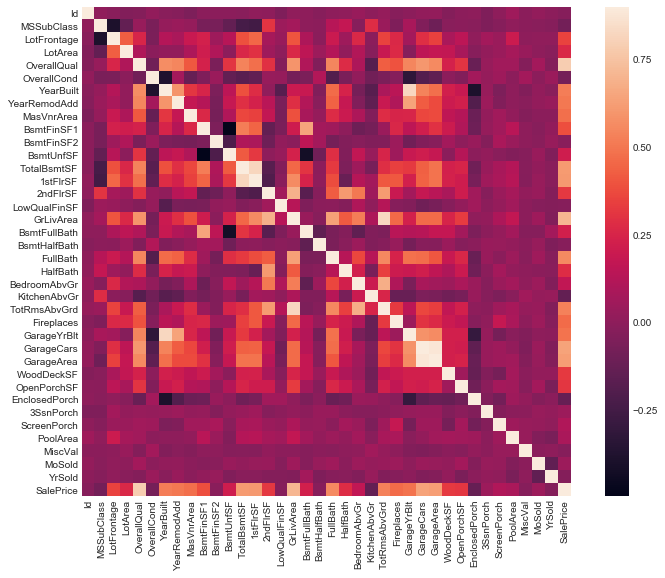

In [3]:
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Now we compute the missing data.

In [4]:
all_data_missing = ((all_data.isnull().sum() / len(all_data)) * 100).sort_values(ascending=False)[:35]

data_missing = pd.DataFrame({'Missing Ratio' :all_data_missing})
data_missing.head(15)
pd.DataFrame(all_data_missing.head())

,0
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


Text(0.5,1,'Percent missing data by feature')

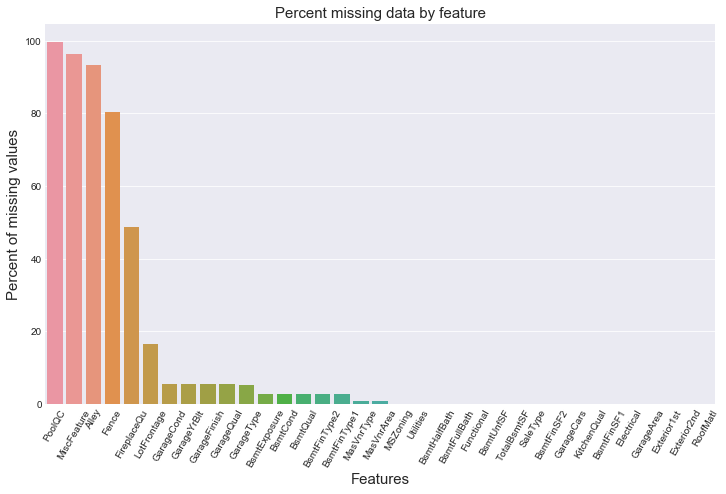

In [5]:
f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='60')
sns.barplot(x=all_data_missing.index, y=all_data_missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Filling the missing data

In [6]:
all_data.head(10)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6

In [7]:
all_data['PoolQC']=all_data['PoolQC'].fillna("NA")
all_data['MiscFeature']=all_data['MiscFeature'].fillna("NA")
all_data['Alley']=all_data['Alley'].fillna("NA")
all_data['Fence']=all_data['Fence'].fillna("NA")
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna("NA")
all_data["LotFrontage"] = all_data.groupby("LotConfig")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#There is two specific cases that we should take into account
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('NA')    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)    
#test=all_data[all_data['GarageType'].notnull() & all_data['GarageFinish'].isnull()]
#test2=all_data[all_data['BsmtCond'].isnull()]
#test3=all_data[all_data['KitchenQual'].isnull()]
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('NA')    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("NA")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data ["MSZoning"] = all_data["MSZoning"].fillna("RL")
all_data ["Utilities"] = all_data["Utilities"].fillna("AllPub")
all_data ["Functional"] = all_data["Functional"].fillna("Typ")
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)    
all_data ["SaleType"] = all_data["SaleType"].fillna("WD")
all_data ["Electrical"] = all_data["Electrical"].fillna("SBrkr")
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])

Now let's transform our categorical 

In [8]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 
#        'YrSold', 'MoSold')

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
         'ExterQual','ExterCond','HeatingQC','KitchenQual','PoolQC',
         'BsmtFinType1','BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope','LotShape','PavedDrive','MSSubClass')
values = [["NA","Po","Fa","TA","Gd","Ex"]]*5+[["Po","Fa","TA","Gd","Ex"]]*4+[["NA","Fa","TA","Gd","Ex"]]+[["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"]]*2+[["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"]]
values = values+ [["NA","MnWw","GdWo","MnPrv","GdPrv"]]+[["NA","No","Mn","Av","Gd"]]+[["NA","Unf","RFn","Fin"]]+[["Sev","Mod","Gtl"]]+[["IR3","IR2","IR1","Reg"]]+[["N","P","Y"]]+[["190","180","160","150","120","90","85","80","75","70","60","50","45","40","30","20"]]

cols2 = ('Street','CentralAir','YrSold','MoSold')

for i in range(len(cols)):
    labelencoder = LabelEncoder()
    labelencoder.fit(values[i])
    all_data[cols[i]]=labelencoder.transform(all_data[cols[i]])

for col in cols2:
    labelencoder = LabelEncoder()
    all_data[col]=labelencoder.fit_transform(all_data[col].values)

## Dealing with the dummies variable

In [9]:
all_data = pd.get_dummies(all_data)
all_data.head(10)
#all_data.reindex(sorted(all_data.columns), axis=1).head(20)

,index,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_NA,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,10,65.0,8450,1,3,0,7,5,2003,2003,196.0,2,4,2,5,4,2,706.0,6,0.0,150.0,856.0,0,1,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,7,0,3,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,0,4,2,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0

So, now our preprocessing is complete. We will have to divide our data into the test set and the train set. We will see if we need to apply some features scaling later. It will depend on the model that we are going to use.

In [10]:
prices = dataset.iloc[:,-1]
prices=pd.DataFrame(prices)
prices.head(8)


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000


In [11]:
prices.shape

(1460, 1)

In [12]:
all_data.shape

(2919, 227)

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

all_data_scaled = sc_X.fit_transform(all_data)
prices_scaled = sc_y.fit_transform(prices)

pd.DataFrame(all_data_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226
0,-1.730864,-1.731458,0.774940,-0.172910,-0.217879,0.064249,0.746669,-0.21626,0.646183,-0.507284,1.046258,0.896833,0.529034,-1.002683,0.376461,-0.650420,0.333532,0.676842,-0.529329,0.581145,0.353536,-0.293025,-0.934165,-0.443078,-0.880324,0.26829,-0.773861,1.207379,-0.101197,0.413547,1.087334,-0.249719,0.781366,1.232599,0.169927,-0.207698,-0.675814,0.986849,0.261785,-0.924311,-0.062540,0.295002,0.104581,0.307040,0.349364,0.326691,0.293549,0.31503,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,0.053507,0.464024,-0.089592,-0.840083,0.157646,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.207057,0.269754,-0.165696,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,3.151600,-0.191250,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.091050,-0.180398,-0.243984,0.403094,-0.08306,-0.116369,-0.098414,-0.132014,-0.045384,-0.055613,-0.041423,-0.066884,0.101903,-0.037043,-0.037043,-0.018512,-0.018512,-0.026185,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.08306,0.513455,-0.087144,-0.482375,-0.061503,-0.041423,-0.018512,0.122276,-0.018512,-0.018512,-0.018512,-0.089118,-0.055613,-0.049029,-0.123711,-0.026185,-0.045384,-0.175272,-0.026185,-0.212398,-0.422424,-0.018512,-0.426919,-0.286204,-0.026185,-0.122276,1.358319,-0.404816,-0.139857,-0.114847,-0.037043,-0.087144,-0.127925,-0.032075,-0.212398,-0.401945,-0.07187,-0.425236,-0.018512,-0.319257,-0.045384,-0.127925,1.369621,-0.393278,-0.168941,-0.092944,1.523423,-0.09105,-1.216566,-0.305382,-0.345324,-0.856372,1.109798,-0.130664,-0.061503,-0.041423,-0.018512,0.12513,-0.096623,-0.055613,-0.026185,-0.045384,-0.262372,-0.132014,-0.052423,-0.018512,0.304040,-0.089118,0.833150,-0.111745,-0.260878,-0.07187,-0.603340,-0.238417,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.728491,-1.730271,-0.577152,0.518746,-0.072044,0.064249,0.746669,-0.21626,-0.063185,2.188279,0.154764,-0.395604,-0.567016,0.746245,0.376461,-0.650420,0.333532,-1.260121,-1.424268,1.178255,0.353536,-0.293025,-0.629284,0.477463,-0.880324,0.26829,0.261075,-0.785025,-0.101197,-0.471891,-0.818929,3.822508,0.781366,-0.756321,0.169927,-0.207698,0.898569,-0.287758,0.261785,0.623632,1.684379,0.234950,0.104581,0.307040,-0.058991,0.326691,0.293549,0.31503,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,0.053507,0.464024,-0.089592,0.164506,-0.602962,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.207057,0.269754,-0.165696,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,5.774182,-0.069421,-1.647343,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.191250,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,10.982941,-0.180

In [14]:
import math

def rmsle_cv(predicted_prices,real_prices):
    return math.sqrt(sum(np.power(np.log(predicted_prices)-np.log(real_prices).transpose()[0],2))/(len(real_prices)))

# Support Vector Regression

Let's fit our model

In [15]:
X = all_data_scaled[:1460,2:]
pd.DataFrame(X).shape

(1460, 225)

In [16]:
from sklearn.svm import SVR

er_min=1000
gg=100000
cc=1000000
regress=0

for c in [500]:
    for g in [0.001,0.01] : 
        SVR_regressor = SVR(C=c, kernel = 'rbf', gamma=g)
        SVR_regressor.fit(X, np.ravel(prices_scaled))
        er=rmsle_cv(sc_y.inverse_transform(SVR_regressor.predict(all_data_scaled[:1460,2:])),sc_y.inverse_transform(prices_scaled))
        if er<er_min:
            gg=g
            cc=c
            er_min=er
            regress=SVR_regressor
#print(gg)
#print(cc)
#print(er_min)
SVR_regressor=regress

### Prediction

In [18]:
y_pred_SVM = sc_y.inverse_transform(SVR_regressor.predict(all_data_scaled[1460:,2:]))
#y_pred = regressor.predict(all_data[1460:,2:])




# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 100)
forest_regressor.fit(all_data.iloc[:1460,2:],np.ravel(prices))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Prediction

In [20]:
predicted_prices_forest = forest_regressor.predict(all_data.iloc[1460:,2:])



# Evaluation of our model

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


In [21]:
score = []
score.append(rmsle_cv(sc_y.inverse_transform(SVR_regressor.predict(all_data_scaled[:1460,2:])),sc_y.inverse_transform(prices_scaled)))
score.append(rmsle_cv(forest_regressor.predict(all_data.iloc[:1460,2:]),prices.values))

Text(0.5,1,'Error from the predicted prices of the train set')

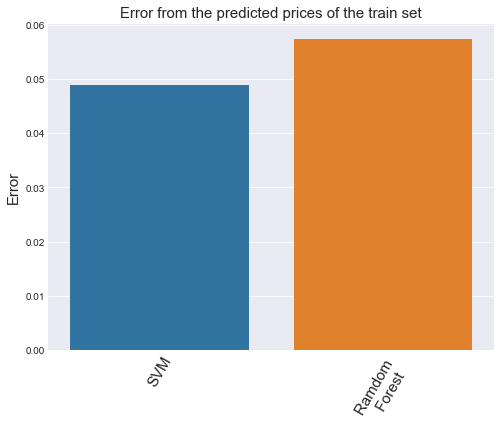

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='60',size=15)
sns.barplot(x=['SVM','Ramdom \n Forest'], y=score)
plt.ylabel('Error', fontsize=15)
plt.title('Error from the predicted prices of the train set', fontsize=15)

## Creation of the output file

Let's write a .csv file with the predicted price and the index of the house.

In [23]:
output=pd.DataFrame(x_test.iloc[:,0])
y_pred=pd.DataFrame(y_pred_SVM)
y_pred.columns = ['SalePrice']
output = pd.concat([output,y_pred], axis=1)
output.to_csv(path_or_buf='result.csv',index=False)
output.head()

,Id,SalePrice
0,1461,140941.650307
1,1462,174331.271548
2,1463,185738.190657
3,1464,195941.812891
4,1465,191369.605140
